In [1]:
import os.path as op
import numpy as np
import glob
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy.visualization as av

# Remedy Basic Info
* Modified version of Remedy developed by Greg Ziemann for VIRUS 
* Code and Documentation can be found: https://github.com/grzeimann/Remedy
* Note note not all documenation/routines are relavent or available for VP reduction with Remedy 
* Returns fiber extracted spectra in e-/s with wavelength solution for each non calibration frame
* Data product is multiextension fits file containing the following 4 extensions:

     0. sky subtracted spectra from fibers with no detected continuum in the frame (PCA analysis)(e-/s)
     1. sky subtracted spectra from fibers with no detected continuum in the frame (simple analysis)(e-/s)
     2. non sky-subtracted spectra (e-/s)
     3. error spectra for non sky-subtracted frame (e-/s)

# Installing Remedy

* Can be installed on TACC or locally 
* The code is large because it provides reduction to multiple instruments 
* Note that because of this not all of the code is relavent to VP reduction
* To install:

        git clone https://github.com/grzeimann/Remedy.git

# Running Remedy for Basic VP Reduction

* Remedy can run on a folder containing data for a single run as long as the grating setup did not change. If the grating was moved at all between nights, reduce those night separately as the wavlength solution can change by a couple pixels between VP setups even if the same setting was requested
    * if you used the same VP grating setup on a single observing run you may reduce all of those images at once as long as each night's data has unique filenames (including guider frames)
* Pull all fit files containing calbiration, standard star, sky frame, and science frame images into a single folder 
* also build a separate folder (can be within the data folder) containing all guider images associated with those files
* general form to run Remedy for basic VP reduction in termainal:

        python /path/Remedy/reduce_virusp.py path/folder_with_data OUTPUTDIR -b -ra

# Example Remedy Data Product

In [2]:
def plot_Remedy_frame(filename, fits_ext, save=False):
    fig, ax = plt.subplots(1,1,figsize=(20,8))

    hdu = fits.open(filename)
    dat = hdu[fits_ext].data
    hdr = hdu[fits_ext].header
    
    norm = av.ImageNormalize(dat, interval=av.ZScaleInterval(),
                      stretch=av.SqrtStretch())
    ax.imshow(dat, norm=norm, cmap='Greys_r', origin='lower')
    xticks_loc = ax.get_xticks() 
    wave_labs = np.round((hdr['CRVAL1'] + (xticks_loc * hdr['CDELT1'])),2)
    ax.set_xticklabels(wave_labs)
    print(xticks_loc)
    
    ax.set_title(hdr['object']+' [Fits Extension: '+str(fits_ext)+']', fontsize=30)
    ax.set_ylabel('Fiber Number', fontsize=25)
    ax.set_xlabel(r'Wavelength ($\AA$)', fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=15)
    if save:
        plt.savefig('/Volumes/B_SS/VIRUS_P/VP_reduction/20210411/COOLJ0931_dither_1_20210411T030846_multi_EXT'+str(fits_ext)+'.png')
    plt.show()

[-250.    0.  250.  500.  750. 1000. 1250. 1500. 1750. 2000. 2250.]


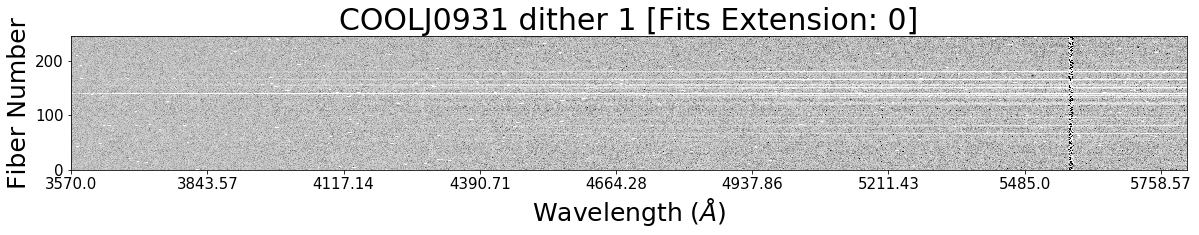

[-250.    0.  250.  500.  750. 1000. 1250. 1500. 1750. 2000. 2250.]


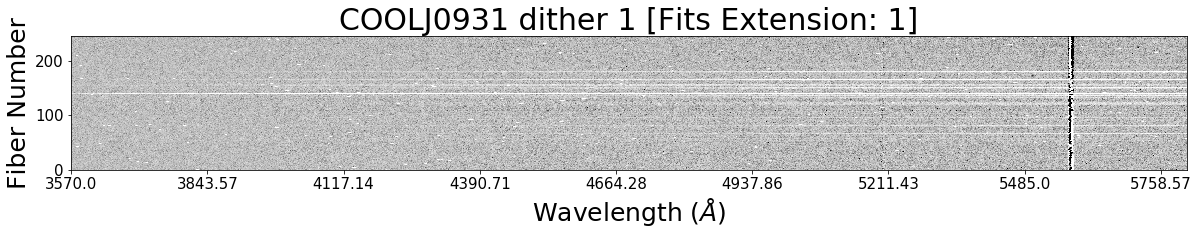

[-250.    0.  250.  500.  750. 1000. 1250. 1500. 1750. 2000. 2250.]


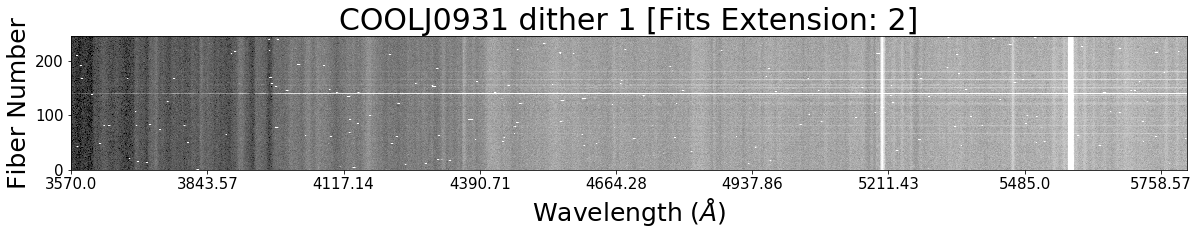

[-250.    0.  250.  500.  750. 1000. 1250. 1500. 1750. 2000. 2250.]


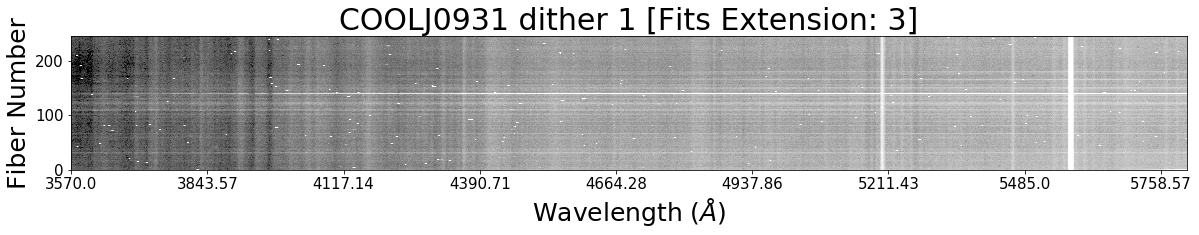

In [4]:
fits_ex = '/Volumes/B_SS/VIRUS_P/VP_reduction/20210411/redux/COOLJ0931_dither_1_20210411T030846_multi.fits'
ext_lis = [0,1,2,3]
for i in ext_lis:
    plot_Remedy_frame(fits_ex, i, save=False)